In [12]:
# read /data/csv/dependencies.csv

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display

df = pd.read_csv("data/csv/dependencies.csv")

display(df)

# df = df.head(1000)

G = nx.from_pandas_edgelist(
    df, source="package", target="dependency", create_using=nx.DiGraph()
)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print(
    "Number of weakly connected components:", nx.number_weakly_connected_components(G)
)
print(
    "Number of strongly connected components:",
    nx.number_strongly_connected_components(G),
)
print("Is directed:", nx.is_directed(G))

,package,dependency
0,libkate,libogg
1,libkate,libpng
2,git-revise,python@3.12
3,dps8m,libuv
4,proj,libtiff
...,...,...
13100,git-plus,python@3.12
13101,ocamlbuild,ocaml
13102,libpinyin,berkeley-db
13103,libpinyin,glib


Number of nodes: 4755
Number of edges: 13092
Number of weakly connected components: 33
Number of strongly connected components: 4755
Is directed: True


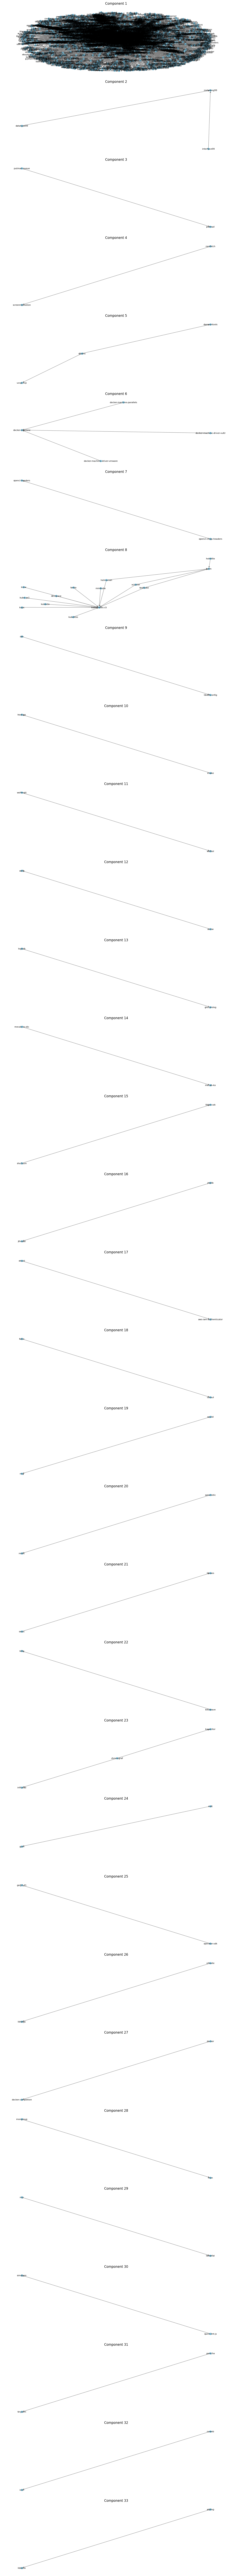

In [14]:
# Draw all weakly connected components
components = list(nx.weakly_connected_components(G))

plt.figure(figsize=(12, len(components) * 4))

for i, component in enumerate(components, start=1):
    plt.subplot(len(components), 1, i)
    H = G.subgraph(component)

    pos = nx.spring_layout(H)

    nx.draw(
        H,
        pos,
        with_labels=True,
        node_size=50,
        node_color="skyblue",
        edge_color="gray",
        font_size=8,
    )
    plt.title(f"Component {i}")

plt.tight_layout()
plt.show()

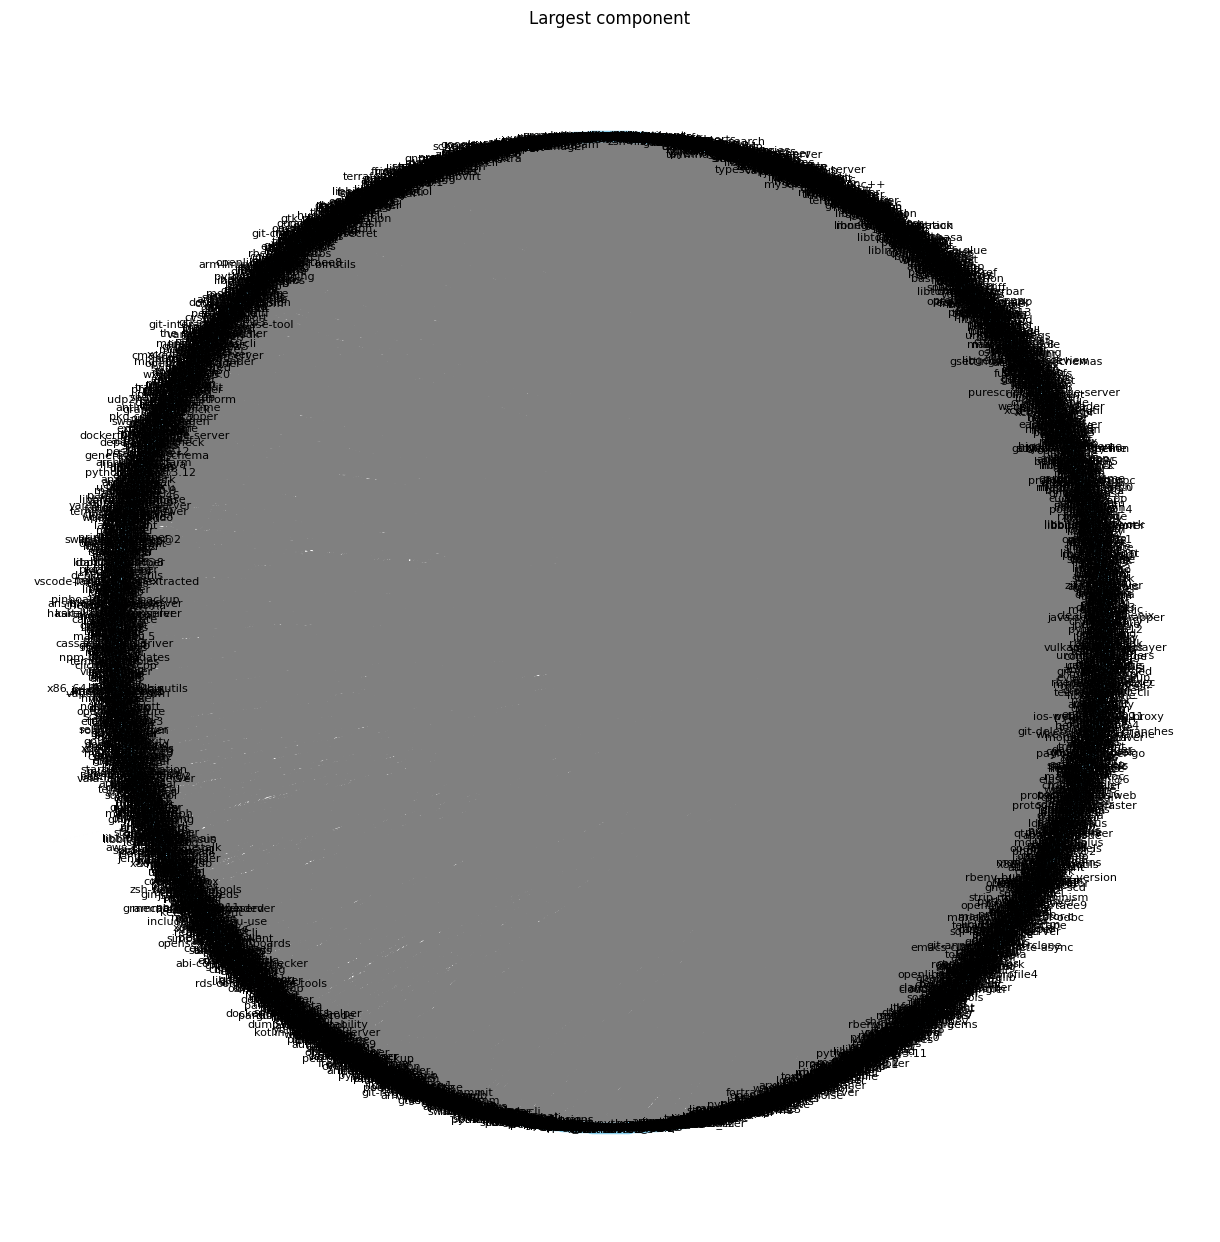

In [15]:
from networkx.drawing.nx_agraph import graphviz_layout

largest_component = max(components, key=len)

# Create a subgraph of the largest component
H = G.subgraph(largest_component)

# Choose a layout
# pos = graphviz_layout(H, prog="dot")

# circular layout
pos = nx.circular_layout(H)

plt.figure(figsize=(12, 12))
nx.draw(
    H,
    pos,
    with_labels=True,
    node_size=50,
    node_color="skyblue",
    edge_color="gray",
    font_size=8,
)
plt.title("Largest component")
plt.axis("equal")
plt.show()